In [113]:
from init import config

# 近似曲線の学習、描画
 - 多項式での近似曲線を学習し、係数、バイアスを取得。
 - 勾配式も同様に取得。
 - 描画。

In [114]:
# データ取得
import db
ticker = db.df.read_ticker(sec_by=60*10)
ltp = ticker[['ltp']]

2017-12-27 20:01:47,782 INFO sqlalchemy.engine.base.Engine DESCRIBE `SELECT * FROM ticker `
2017-12-27 20:01:47,905 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 20:01:48,106 INFO sqlalchemy.engine.base.Engine SELECT * FROM ticker 
2017-12-27 20:01:48,113 INFO sqlalchemy.engine.base.Engine ()


In [115]:
import numpy as np
import learner
from plotter.plot import set_figure, plot
set_figure((16,5))

In [116]:
x  = np.array([i.timestamp() for i in ltp.index])
y = np.array(ltp[["ltp"]])

In [117]:
# 近似曲線多項式の生成
poly10, grad10 = learner.polyfit(x, y, 10)
# 近似式による y
poly10_y = np.array([poly10(i) for i in x])

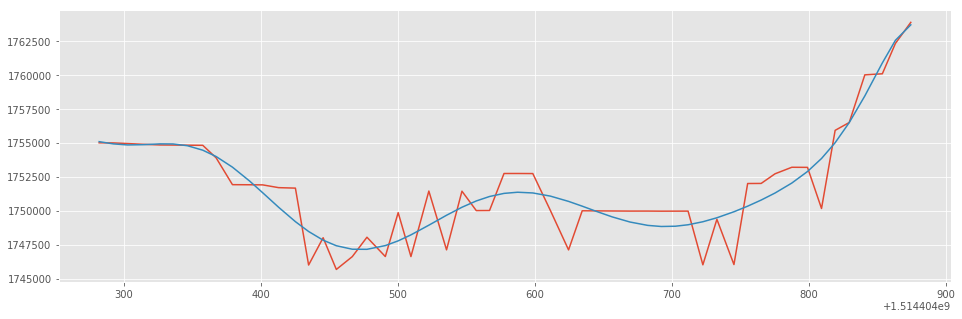

In [118]:
plot(x, y, "-", label="raw")
plot(x, poly10_y, "-", label="poly")

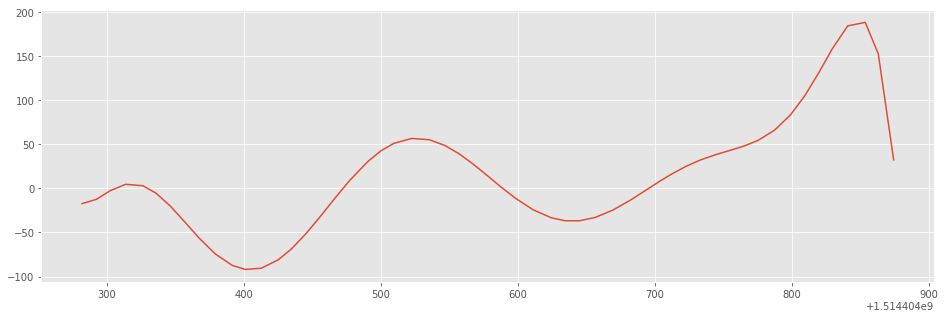

In [120]:
# 勾配
poly_dy= np.array([grad10(i) for i in x])
plot(x, poly_dy, "-")

# 短期曲線、長期曲線
時間の幅を変化させて比較。

- 気付き
    - bitflyerの曲線は、それまでの曲線は更新されていない。  
    最新の点を何らかの処理で求めて、それを繋げている。  
    おそらく、時間で区切った累計の値になる。

In [121]:
import numpy as np
import learner
from plotter.plot import set_figure, plot
set_figure((16,5))

In [122]:
def time_ltp(df):
    x = np.array([i.timestamp() for i in df.index])
    y = np.array(df[["ltp"]])
    return x,y
    
def cal_poly_ltp(df, deg):
    x, y = time_ltp(df)
    # 近似曲線多項式の生成
    poly, grad = learner.polyfit(x, y, deg)
    # 近似式による y
    poly_y = np.array([poly(i) for i in x])
    return x, poly_y

2017-12-27 20:03:10,101 INFO sqlalchemy.engine.base.Engine DESCRIBE `SELECT * FROM ticker `
2017-12-27 20:03:10,103 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 20:03:10,116 INFO sqlalchemy.engine.base.Engine ROLLBACK
2017-12-27 20:03:10,137 INFO sqlalchemy.engine.base.Engine SELECT * FROM ticker 
2017-12-27 20:03:10,138 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 20:03:11,351 INFO sqlalchemy.engine.base.Engine DESCRIBE `SELECT * FROM ticker `
2017-12-27 20:03:11,352 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 20:03:11,368 INFO sqlalchemy.engine.base.Engine ROLLBACK
2017-12-27 20:03:11,391 INFO sqlalchemy.engine.base.Engine SELECT * FROM ticker 
2017-12-27 20:03:11,393 INFO sqlalchemy.engine.base.Engine ()


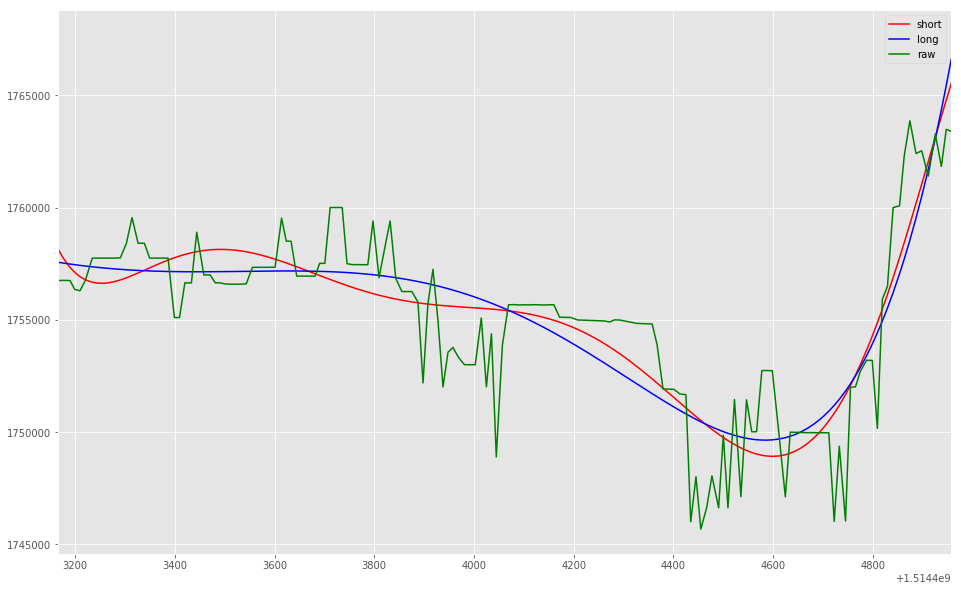

In [125]:
%matplotlib inline
long_ticker = db.df.read_ticker(sec_by=60*60)
short_ticker = db.df.read_ticker(sec_by=60*30)

_, long_y = time_ltp(long_ticker)
long_x, long_poly_y  = cal_poly_ltp(long_ticker, 7)
short_x, short_poly_y  = cal_poly_ltp(short_ticker, 7)

from plotter.plot import plt
set_figure((16, 10))
plot(short_x, short_poly_y, "r-", label="short")
plot(long_x, long_poly_y, "b-", label="long")
plot(long_x, long_y, "g-", label="raw")
plt.xlim([short_x.min(), short_x.max()])
plt.legend()